Будем получать данные с нормальным распределением с помощью генетического программирования 

In [25]:
%pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KstestResult(statistic=0.5245029352292184, pvalue=1.1884904069157568e-05, statistic_location=0.18785013971498854, statistic_sign=-1)
KstestResult(statistic=0.5397010750920728, pvalue=5.579137181816357e-06, statistic_location=0.09968066670951536, statistic_sign=-1)


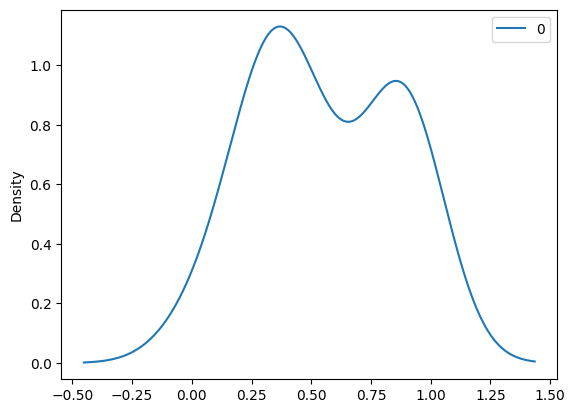

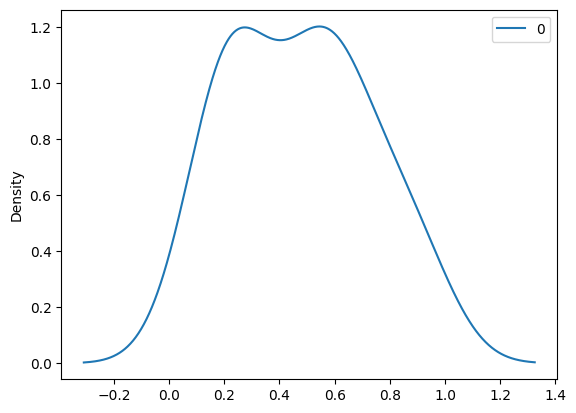

In [26]:
%matplotlib inline

import pygad
import random
import matplotlib
import pandas
from scipy.stats import kstest

pop_size = 200
parents_mating = 20
gen_num = 20

initial_pop=[]
for i in range(pop_size):
    data = []
    for j in range(gen_num):
        data.append(random.random())
    initial_pop.append(data)

pandas.DataFrame(data=initial_pop[0]).plot.kde()
print(kstest(initial_pop[0], 'norm'))

pandas.DataFrame(data=initial_pop[1]).plot.kde()
print(kstest(initial_pop[1], 'norm'))




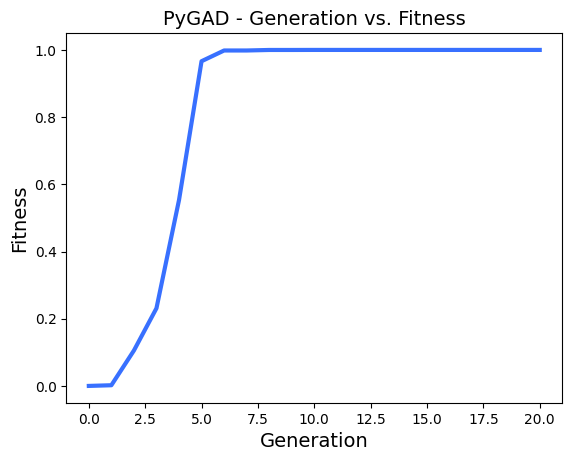

Fitness value of the best solution = 0.9999999425440307


<Axes: ylabel='Density'>

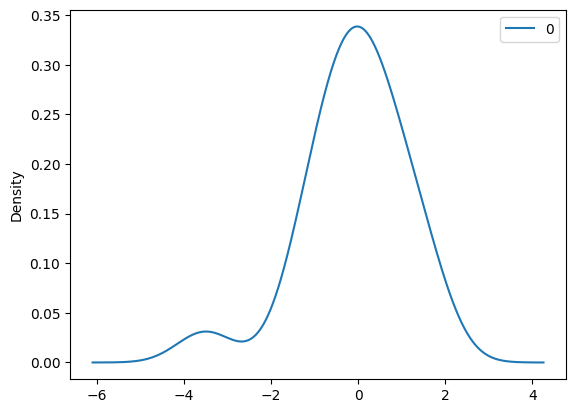

In [27]:
def fitness_func(ga_instance, solution, solution_idx):
    teststat, pvalue = kstest(solution, 'norm')
    return pvalue

last_fitness = 0


ga_instance = pygad.GA(num_generations=gen_num,
                       num_parents_mating=parents_mating,
                       sol_per_pop=pop_size,
                       num_genes=gen_num,
                       fitness_func=fitness_func, 
                       initial_population=initial_pop)

ga_instance.run()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

df = pandas.DataFrame(data=solution)
df.plot.kde()